## **<center>ML Intermediate - Avocado price dataset Project</center>**

---
<a name = Section2></a>
# **Problem Statement**
---
### The current process suffers from the following problems:
- The price of avocado is dependent on global demands and seasonal production.

- Due to these reasons, it is quite difficult to know for certain the price in the future.

- They want to automate the process of predicting the future price of avocado, based on the historical data.

Deliverable: Predict the average price of a single avocado.

Machine Learning Task: Regression

Target Variable: AveragePrice

<a name = Section33></a>
### **Importing Libraries**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

||Column Name|Description|
|:--|:--|:--|
||**Id**| Unique identity of each observation. |
||**Date**| The date of the observation. |
||**AveragePrice**| The average price of a single avocado. |
||**Total Volume**| Total number of avocados sold. |
||**4046**| Total number of avocados with PLU 4046 sold. |
||**4225**| Total number of avocados with PLU 4225 sold. |
||**4770**| Total number of avocados with PLU 4770 sold. |
||**Total Bags**| Total number of bags sold. |
||**Small Bags**| Total number of small bags sold.|
||**Large Bags**| Total number of large bags sold.|
||**XLarge Bags**| Total number of extra-large bags sold.|
||**type**| Type of an avocado (conventional or organic).|
||**year**| The year of observation. |
||**Region**| The city or region of the observation.|

<a name = Section33></a>
### **Data Acquisition**

In [14]:
df_train=pd.read_csv('avocado_train.csv')
df_test=pd.read_csv('avocado_test.csv')

In [15]:
df_train.head()

,Id,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,14761,2017-08-20,1.86,2584.08,61.21,143.82,0.00,2379.05,2379.05,0.00,0.0,organic,2017,Albany
1,6843,2017-11-12,1.14,100811.00,3181.00,43510.00,86.00,54034.00,11788.00,42246.00,0.0,conventional,2017,Louisville
2,7306,2017-02-12,0.95,430096.94,242212.80,81697.52,264.25,105922.37,48557.37,57365.00,0.0,conventional,2017,Orlando
3,12329,2016-05-22,1.71,5433.16,437.48,2422.71,544.63,2028.34,2021.67,6.67,0.0,organic,2016,Charlotte
4,12036,2016-01-10,1.66,5614.09,2123.47,2121.26,0.00,1369.36,392.02,977.34,0.0,organic,2016,Atlanta


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.6+ MB


##### There are no NULL values present in the dataset

In [16]:
#Deleting ID column as it is unique id
df_train.drop(columns='Id',inplace=True)

In [17]:
df_train.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,14599.000000,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,1.459900e+04,14599.000000,14599.000000
mean,1.409168,8.136614e+05,2.787616e+05,2.835157e+05,2.175564e+04,2.296264e+05,1.746354e+05,5.199545e+04,2995.622236,2016.146174
std,0.404518,3.292013e+06,1.206792e+06,1.150215e+06,1.025608e+05,9.429775e+05,7.139212e+05,2.343441e+05,17313.445157,0.937565
min,0.440000,3.855500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.080823e+04,8.493600e+02,3.018255e+03,0.000000e+00,5.040900e+03,2.828890e+03,1.314550e+02,0.000000,2015.000000
50%,1.370000,1.070186e+05,8.425390e+03,2.890747e+04,1.807200e+02,3.960296e+04,2.631176e+04,2.621750e+03,0.000000,2016.000000
75%,1.670000,4.261702e+05,1.087822e+05,1.451605e+05,6.136665e+03,1.096453e+05,8.300046e+04,2.151112e+04,127.940000,2017.000000
max,3.250000,6.250565e+07,2.162018e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [18]:
#Copy the Datafrom to working dataframe
df_train_1=df_train.copy(deep=True)

In [19]:
### Drop columns 4046, 4225 and 4770 as we have Total Volume column
### Drop columns Small Bags, Large Bags and XLarge Bags as we have Total Bags column
df_train_1.drop(columns=['4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],inplace=True)

In [23]:
df_train_1.head()

,Date,AveragePrice,Total Volume,Total Bags,type,year,region,Month,Day
0,2017-08-20,1.86,2584.08,2379.05,organic,2017,Albany,8,20
1,2017-11-12,1.14,100811.00,54034.00,conventional,2017,Louisville,11,12
2,2017-02-12,0.95,430096.94,105922.37,conventional,2017,Orlando,2,12
3,2016-05-22,1.71,5433.16,2028.34,organic,2016,Charlotte,5,22
4,2016-01-10,1.66,5614.09,1369.36,organic,2016,Atlanta,1,10


In [21]:
import datetime

In [22]:
df_train_1['Date'] = pd.to_datetime(df_train_1['Date'], format='%Y-%m-%d')
df_train_1['Month']=df_train_1['Date'].dt.month
df_train_1['Day']=df_train_1['Date'].dt.day

In [24]:
#Drop Date column
df_train_1.drop(columns=['Date'],inplace=True)

In [29]:
le=LabelEncoder()

In [30]:
columns=['region', 'type']
df_train_1[columns] = df_train_1[columns].apply(le.fit_transform)

In [32]:
ss=StandardScaler()

In [34]:
df_train_1[['Total Volume','Total Bags']] =ss.fit_transform(df_train_1[['Total Volume','Total Bags']])

In [35]:
df_train_1.head()

,AveragePrice,Total Volume,Total Bags,type,year,region,Month,Day
0,1.86,-0.246386,-0.240997,1,2017,0,8,20
1,1.14,-0.216547,-0.186217,0,2017,23,11,12
2,0.95,-0.116518,-0.131189,0,2017,31,2,12
3,1.71,-0.245520,-0.241369,1,2016,7,5,22
4,1.66,-0.245465,-0.242068,1,2016,1,1,10


<AxesSubplot:>

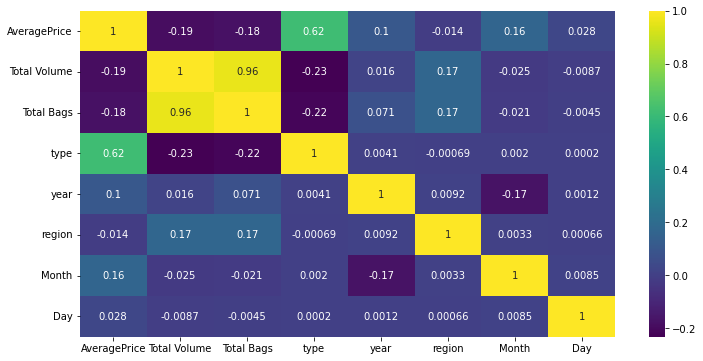

In [45]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train_1.corr(),cmap='viridis',annot=True)

### Splitting the data into X and y

In [46]:
X=df_train_1.drop('AveragePrice',axis=1)
y=df_train_1['AveragePrice']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=123)

### Bulding LinearRegression Model

In [49]:
lr=LinearRegression()

In [76]:
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
lr_pred=lr.predict(X_test)

In [78]:
MAE = metrics.mean_absolute_error(y_test, lr_pred)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, lr_pred)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, lr_pred))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,lr_pred)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.24036478918059775
MSE for Test set is 0.09517427344897209
RMSE for Test set is 0.30850327947847184
R2 score for Test set is 0.4176750722257677
Adjusted R2 score for Test set is 0.4164582738692245


<AxesSubplot:xlabel='AveragePrice'>

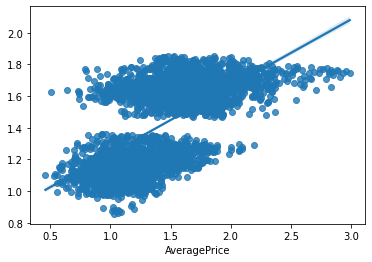

In [80]:
sns.regplot(y_test,lr_pred)

#### Decision Tree

In [81]:
dt=DecisionTreeRegressor()

In [83]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
dt_pred=dt.predict(X_test)

In [85]:
MAE = metrics.mean_absolute_error(y_test, dt_pred)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, dt_pred)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, dt_pred))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,dt_pred)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.13882370458606313
MSE for Test set is 0.043988653960690884
RMSE for Test set is 0.20973472283027167
R2 score for Test set is 0.730854895842426
Adjusted R2 score for Test set is 0.7302925030874698


<AxesSubplot:xlabel='AveragePrice'>

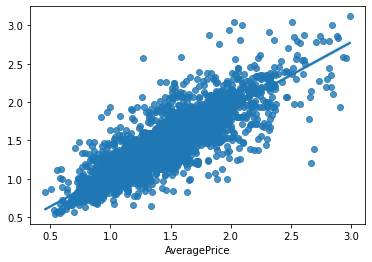

In [86]:
sns.regplot(y_test,dt_pred)

#### RandomForest

In [87]:
rf=RandomForestRegressor()

In [88]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
rf_pred=rf.predict(X_test)

In [90]:
MAE = metrics.mean_absolute_error(y_test, rf_pred)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_pred)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_pred)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.10539365693865398
MSE for Test set is 0.022801136036331146
RMSE for Test set is 0.15100045045075577
R2 score for Test set is 0.8604909770848334
Adjusted R2 score for Test set is 0.8601994656936673


<AxesSubplot:xlabel='AveragePrice'>

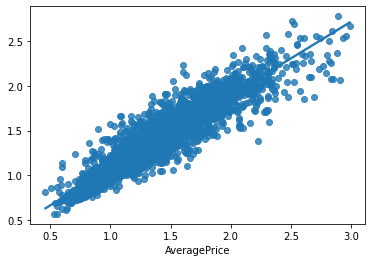

In [91]:
sns.regplot(y_test,rf_pred)

#### Randomized Search Cv

In [92]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

In [93]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [94]:
# Display the best estimator
print(rf_randomcv.best_estimator_)

RandomForestRegressor(max_depth=25, min_samples_leaf=2, min_samples_split=15,
                      n_estimators=400)


In [95]:
best_random_grid=rf_randomcv.best_estimator_

In [96]:
rf_rscv_pred=best_random_grid.predict(X_test)

In [97]:
MAE = metrics.mean_absolute_error(y_test, rf_rscv_pred)   
print('MAE for Test is {}'.format(MAE))

MSE = metrics.mean_squared_error(y_test, rf_rscv_pred)
print('MSE for Test set is {}'.format(MSE))

RMSE = np.sqrt(metrics.mean_squared_error(y_test, rf_rscv_pred))
print('RMSE for Test set is {}'.format(RMSE))

r2 = metrics.r2_score(y_test,rf_rscv_pred)
print("R2 score for Test set is {}".format(r2))

adj_r_squared = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for Test set is {}".format(adj_r_squared))

MAE for Test is 0.11912854656670972
MSE for Test set is 0.027521045351226642
RMSE for Test set is 0.1658946815037379
R2 score for Test set is 0.8316121556208473
Adjusted R2 score for Test set is 0.8312603004236372


<AxesSubplot:xlabel='AveragePrice'>

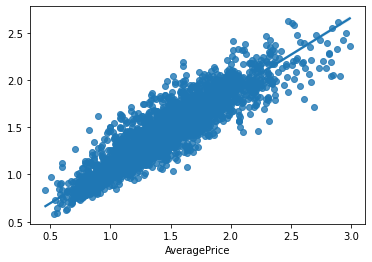

In [98]:
sns.regplot(y_test,rf_rscv_pred)

#### Conclusion

RandomForest Regressor Gave best prediction

So, prediction for test dataset can perform using RandomForest Regression

#### Working with Test Dataset

In [100]:
df_test.drop(columns=['Id','4046','4225','4770','Small Bags','Large Bags','XLarge Bags'],inplace=True)

In [102]:
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%Y-%m-%d')
df_test['Month']=df_test['Date'].dt.month
df_test['Day']=df_test['Date'].dt.day

#Drop Date column
df_test.drop(columns=['Date'],inplace=True)

In [104]:
df_test[columns] = df_test[columns].apply(le.fit_transform)

df_test[['Total Volume','Total Bags']] =ss.fit_transform(df_test[['Total Volume','Total Bags']])

In [105]:
df_test.head()

,Total Volume,Total Bags,type,year,region,Month,Day
0,-0.244574,-0.240260,1,2015,38,5,3
1,-0.244720,-0.237032,1,2017,33,10,8
2,0.806493,1.269092,0,2017,15,7,2
3,-0.229067,-0.217994,0,2017,49,5,14
4,-0.246516,-0.243654,1,2015,26,12,13


Predicting for Test dataset with RandomForest as I got best Accuracy score for this Model

In [106]:
test_predictions=rf.predict(df_test)

In [107]:
test_predictions

array([1.3236, 1.9637, 1.2603, ..., 1.0905, 1.5886, 1.6239])

In [108]:
Avacado_Predictions = pd.DataFrame(test_predictions, columns=['predictions']).to_csv('Avacado_Predictions.csv',index=False,header=False)